# Load the NYC Taxi Fares dataset
The Kaggle competition provides a dataset with about 55 million records. The data contains only the pickup date & time, the latitude & longitude (GPS coordinates) of the pickup and dropoff locations, and the number of passengers. It is up to the contest participant to extract any further information. For instance, does the time of day matter? The day of the week? How do we determine the distance traveled from pairs of GPS coordinates?

For this exercise we've whittled the dataset down to just 120,000 records from April 11 to April 24, 2010. The records are randomly sorted. We'll show how to calculate distance from GPS coordinates, and how to create a pandas datatime object from a text column. This will let us quickly get information like day of the week, am vs. pm, etc.

In [72]:
import torch
import torch.nn as nn

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [73]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [74]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [75]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [76]:
df['dist_km'] = haversine_distance(df,'pickup_latitude', 'pickup_longitude','dropoff_latitude','dropoff_longitude')

In [77]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null object
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [79]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
pickup_datetime      120000 non-null datetime64[ns, UTC]
fare_amount          120000 non-null float64
fare_class           120000 non-null int64
pickup_longitude     120000 non-null float64
pickup_latitude      120000 non-null float64
dropoff_longitude    120000 non-null float64
dropoff_latitude     120000 non-null float64
passenger_count      120000 non-null int64
dist_km              120000 non-null float64
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [81]:
my_time = df['pickup_datetime'][0]

In [82]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours=4)

In [83]:
df['Hour'] = df['EDTdate'].dt.hour

In [84]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [85]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm


In [86]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [87]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [88]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [89]:
cat_cols = ['Hour', 'AMorPM', 'Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km',]

In [90]:
y_col = ['fare_amount']

In [91]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int64
AMorPM                            object
Weekday                           object
dtype: object

In [92]:
for cat in cat_cols:
    df[cat] = df[cat].astype('category')

In [93]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int64): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [94]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): [am, pm]

In [95]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): [Fri, Mon, Sat, Sun, Thu, Tue, Wed]

In [96]:
df['AMorPM'].cat.categories

Index(['am', 'pm'], dtype='object')

In [97]:
df['AMorPM'].cat.codes.values

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [98]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

cats = np.stack([hr, ampm, wkdy], 1)

cats[:5]

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       [17,  1,  3],
       [22,  1,  0]], dtype=int8)

In [99]:
# # Convert categorical variables to a tensor
cats = torch.tensor(cats, dtype=torch.int64) 
# # this syntax is ok, since the source data is an array, not an existing tensor

# cats[:5]

# cats = np.stack([df[col].cat.codes.values for col in cat_cols], 1)

In [100]:
conts = np.stack([df[col].values for col in cont_cols],axis=1)

In [101]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [102]:
conts = torch.tensor(conts,dtype=torch.float)

In [103]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [104]:
y = torch.tensor(df[y_col].values,dtype=torch.float) # .reshape(-1,1)

In [105]:
cats.shape

torch.Size([120000, 3])

In [106]:
conts.shape

torch.Size([120000, 6])

In [107]:
y.shape

torch.Size([120000, 1])

In [108]:
# This will set embedding sizes for Hours, AMvsPM and Weekdays
cat_szs = [len(df[col].cat.categories) for col in cat_cols]
emb_szs = [(size, min(50, (size+1)//2)) for size in cat_szs]
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [109]:
# This is our source data
catz = cats[:4]
catz

tensor([[ 4,  0,  1],
        [11,  0,  2],
        [ 7,  0,  2],
        [17,  1,  3]])

In [110]:
# This is assigned inside the __init__() method
selfembeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [111]:
list(enumerate(selfembeds))

[(0, Embedding(24, 12)), (1, Embedding(2, 1)), (2, Embedding(7, 4))]

In [112]:
# This happens inside the forward() method
embeddingz = []

for i,e in enumerate(selfembeds):
    embeddingz.append(e(catz[:,i]))
embeddingz

[tensor([[-0.4690, -0.7815, -0.0129, -0.9203, -1.1545, -0.7622, -0.8058, -0.5245,
          -0.2154,  0.0495,  1.2015,  0.2371],
         [-0.5187,  0.7681, -0.5885,  0.3307,  0.1546,  0.5675, -1.9192, -0.9701,
          -0.8160, -0.4944, -3.4585,  0.2681],
         [-0.3610,  0.5839, -0.7806, -0.4525, -0.4582, -0.6755, -0.4322, -0.7655,
          -1.5110,  0.9457, -0.4078, -0.5201],
         [ 0.7879, -1.9161,  0.6764, -1.3461, -0.8204,  0.6758,  0.0378, -0.3443,
           0.5019, -1.3008,  1.6451, -0.1101]], grad_fn=<EmbeddingBackward>),
 tensor([[2.3005],
         [2.3005],
         [2.3005],
         [0.6192]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.4820, -0.4237,  1.4743,  0.7572],
         [-0.3194, -0.6019, -0.4471,  1.0572],
         [-0.3194, -0.6019, -0.4471,  1.0572],
         [-0.7444,  1.0569,  0.7081, -1.0149]], grad_fn=<EmbeddingBackward>)]

In [113]:
embeddingz

[tensor([[-0.4690, -0.7815, -0.0129, -0.9203, -1.1545, -0.7622, -0.8058, -0.5245,
          -0.2154,  0.0495,  1.2015,  0.2371],
         [-0.5187,  0.7681, -0.5885,  0.3307,  0.1546,  0.5675, -1.9192, -0.9701,
          -0.8160, -0.4944, -3.4585,  0.2681],
         [-0.3610,  0.5839, -0.7806, -0.4525, -0.4582, -0.6755, -0.4322, -0.7655,
          -1.5110,  0.9457, -0.4078, -0.5201],
         [ 0.7879, -1.9161,  0.6764, -1.3461, -0.8204,  0.6758,  0.0378, -0.3443,
           0.5019, -1.3008,  1.6451, -0.1101]], grad_fn=<EmbeddingBackward>),
 tensor([[2.3005],
         [2.3005],
         [2.3005],
         [0.6192]], grad_fn=<EmbeddingBackward>),
 tensor([[ 0.4820, -0.4237,  1.4743,  0.7572],
         [-0.3194, -0.6019, -0.4471,  1.0572],
         [-0.3194, -0.6019, -0.4471,  1.0572],
         [-0.7444,  1.0569,  0.7081, -1.0149]], grad_fn=<EmbeddingBackward>)]

In [114]:
# We concatenate the embedding sections (12,1,4) into one (17)
z = torch.cat(embeddingz, 1)
z

tensor([[-0.4690, -0.7815, -0.0129, -0.9203, -1.1545, -0.7622, -0.8058, -0.5245,
         -0.2154,  0.0495,  1.2015,  0.2371,  2.3005,  0.4820, -0.4237,  1.4743,
          0.7572],
        [-0.5187,  0.7681, -0.5885,  0.3307,  0.1546,  0.5675, -1.9192, -0.9701,
         -0.8160, -0.4944, -3.4585,  0.2681,  2.3005, -0.3194, -0.6019, -0.4471,
          1.0572],
        [-0.3610,  0.5839, -0.7806, -0.4525, -0.4582, -0.6755, -0.4322, -0.7655,
         -1.5110,  0.9457, -0.4078, -0.5201,  2.3005, -0.3194, -0.6019, -0.4471,
          1.0572],
        [ 0.7879, -1.9161,  0.6764, -1.3461, -0.8204,  0.6758,  0.0378, -0.3443,
          0.5019, -1.3008,  1.6451, -0.1101,  0.6192, -0.7444,  1.0569,  0.7081,
         -1.0149]], grad_fn=<CatBackward>)

In [115]:
selfembeddrop = nn.Dropout(0.4)

In [116]:
z = selfembeddrop(z)

In [117]:
class TabularModel(nn.Module):

    def __init__(self, emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni, nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        
        layerlist = []
        n_emb = sum((nf for ni,nf in emb_szs))
        n_in = n_emb + n_cont
        
        for i in layers:
            layerlist.append(nn.Linear(n_in,i)) 
            layerlist.append(nn.ReLU(inplace=True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
            
        self.layers = nn.Sequential(*layerlist)
    
    def forward(self, x_cat, x_cont):
        embeddings = []
        for i,e in enumerate(self.embeds):
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.emb_drop(x)
        
        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x, x_cont], 1)
        x = self.layers(x)
        return x

In [119]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [120]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [121]:
criterion = nn.MSELoss()  # we'll convert this to RMSE later
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [122]:
batch_size = 60000
test_size = int(batch_size * .2)

cat_train = cats[:batch_size-test_size]
cat_test = cats[batch_size-test_size:batch_size]
con_train = conts[:batch_size-test_size]
con_test = conts[batch_size-test_size:batch_size]
y_train = y[:batch_size-test_size]
y_test = y[batch_size-test_size:batch_size]

In [ ]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1], 1, [200,100], p=0.4)

In [123]:
len(cat_train)

48000

In [124]:
len(con_train)

48000

In [125]:
len(cat_test)

12000

In [126]:
import time

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs):
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred, y_train)) # RMSE
    losses.append(loss)
    
    # a neat trick to save screen space:
    if i%25 == 1:
        print(f'epoch: {i:3}  loss: {loss.item():10.8f}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

print(f'epoch: {i:3}  loss: {loss.item():10.8f}') # print the last line
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed

epoch:   1  loss: 12.50055885
epoch:  26  loss: 11.53102207
epoch:  51  loss: 10.48028469
epoch:  76  loss: 9.53442478
epoch: 101  loss: 8.73125076
epoch: 126  loss: 7.82755327
epoch: 151  loss: 6.71817207
epoch: 176  loss: 5.49549103
epoch: 201  loss: 4.36130285
epoch: 226  loss: 3.68610692
epoch: 251  loss: 3.49326921
epoch: 276  loss: 3.41978025
epoch: 300  loss: 3.39718485

Duration: 891 seconds


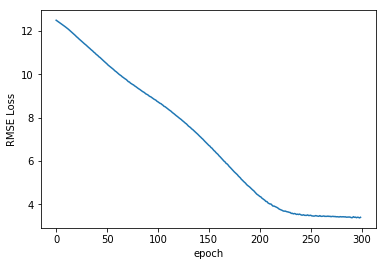

In [127]:
plt.plot(range(epochs), losses)
plt.ylabel('RMSE Loss')
plt.xlabel('epoch');

In [128]:
# TO EVALUATE THE ENTIRE TEST SET
with torch.no_grad():
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))
print(f'RMSE: {loss:.8f}')

RMSE: 3.32238650


In [129]:
loss

tensor(3.3224)

In [132]:
print(f'{"PREDICTED":>12} {"ACTUAL":>8} {"DIFF":>8}')
for i in range(50):
    diff = np.abs(y_val[i].item()-y_test[i].item())
    print(f'{i+1:2}. {y_val[i].item():8.4f} {y_test[i].item():8.4f} {diff:8.4f}')

   PREDICTED   ACTUAL     DIFF
 1.   3.6699   2.9000   0.7699
 2.  25.6721   5.7000  19.9721
 3.   6.2900   7.7000   1.4100
 4.  13.3448  12.5000   0.8448
 5.   4.7232   4.1000   0.6232
 6.   5.4614   5.3000   0.1614
 7.   4.2505   3.7000   0.5505
 8.  17.5475  14.5000   3.0475
 9.   7.1971   5.7000   1.4971
10.  11.4546  10.1000   1.3546
11.   5.7659   4.5000   1.2659
12.   6.0524   6.1000   0.0476
13.   5.7368   6.9000   1.1632
14.  12.5386  14.1000   1.5614
15.   6.0323   4.5000   1.5323
16.  29.2291  34.1000   4.8709
17.   2.9297  12.5000   9.5703
18.   5.0432   4.1000   0.9432
19.   7.9954   8.5000   0.5046
20.   5.8333   5.3000   0.5333
21.  15.0872  11.3000   3.7872
22.   9.0042  10.5000   1.4958
23.  15.3812  15.3000   0.0812
24.  19.2642  14.9000   4.3642
25.  46.1287  49.5700   3.4413
26.   6.0002   5.3000   0.7002
27.   5.5896   3.7000   1.8896
28.   8.0890   6.5000   1.5890
29.  14.3921  14.1000   0.2921
30.   6.8599   4.9000   1.9599
31.   5.8944   3.7000   2.1944
32.  34.

In [134]:
torch.save(model.state_dict(),'TaxiModel.pt')